In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scanpy
!pip install matplotlib==3.1.3
!pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 9.2 MB/s 
     |████████████████████████████████| 11.2 MB 17.8 MB/s 
     |████████████████████████████████| 88 kB 9.5 MB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 930 kB 70.9 MB/s 
     |████████████████████████████████| 1.1 MB 67.3 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=aee3ed1c31b8c3f6a280ac075c94937fd8ef3a408ee725fbad9f2a5de9d20977
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=75ff66b4af5d16fdd1d522c40a9d7340cb96908504ac790492b1101af3bdfe91
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 15.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 1.6 MB 60.3 MB/s 
     |████████████████████████████████| 438 kB 77.6 MB/s 
     |████████████████████████████████| 5.8 MB 57.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [3]:
import numpy as np 
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math
import scipy
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [4]:
Pancreas_adata = sc.read_text('/content/drive/MyDrive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_LogX_CellCycleRegressedOut.txt', delimiter = '\t', first_column_names=None)
sc.pp.scale(Pancreas_adata)
Pancreas_adata

AnnData object with n_obs × n_vars = 2209 × 26179
    var: 'mean', 'std'

In [5]:
PancreasMetadata = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/Pancreas Data/Processed/PancreasMetadata.csv")
Pancreas_adata.obs['Cell Type'] = PancreasMetadata['Cell type'].values
Pancreas_adata.obs['Cell Type'].unique()

array(['γ', 'α', 'β', 'acinar', 'ε', 'unclassified exocrine', 'ductal',
       'δ', 'unclassified endocrine', 'endothelial', 'co-expression',
       'PSC', 'mast', 'MHC'], dtype=object)

In [6]:
PancreasCellID = []
for item in PancreasMetadata['Cell ID'].values:
  PancreasCellID.append(item)
Pancreas_adata.obs_names = PancreasCellID
Pancreas_adata.obs_names

Index(['HP1502401_H13', 'HP1502401_J14', 'HP1502401_B14', 'HP1502401_A14',
       'HP1502401_C14', 'HP1502401_G14', 'HP1502401_E14', 'HP1502401_L14',
       'HP1502401_M14', 'HP1502401_K14',
       ...
       'HP1526901T2D_M7', 'HP1526901T2D_N16', 'HP1526901T2D_C8',
       'HP1526901T2D_H2', 'HP1526901T2D_I16', 'HP1526901T2D_F7',
       'HP1525301T2D_K3', 'HP1525301T2D_J10', 'HP1526901T2D_N8',
       'HP1526901T2D_A8'],
      dtype='object', length=2209)

In [7]:
PancreasGenes = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_Genelist.txt",header=None)
PancreasGenelist = []
for item in PancreasGenes.values.tolist():
  PancreasGenelist.append(item[0])
Pancreas_adata.var_names = PancreasGenelist
Pancreas_adata.var_names

Index(['SGIP1', 'AZIN2', 'CLIC4', 'AGBL4', 'NECAP2', 'SLC45A1', 'TGFBR3',
       'DBT', 'RFWD2', 'C1orf21',
       ...
       'KIR3DS1', 'KIR2DL5B', 'KIR2DS2', 'KIR2DS1', 'KIR2DL2', 'KIR2DL4',
       'KIR2DS3', 'KIR2DS2', 'BIVM-ERCC5', 'ERCC_30000:mix1_7500:mix2'],
      dtype='object', length=26179)

In [8]:
# Exclude cells with cell type assignments that are not well-defined 
# i.e. unclassified exocrine, unclassified endocrine, co-expression, MHC
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'unclassified exocrine'))[0,:],:]
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'unclassified endocrine'))[0,:],:]
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'co-expression'))[0,:],:]
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'MHC'))[0,:],:]

print(Pancreas_adata.shape)
Pancreas_adata.obs['Cell Type'].unique()

(2209, 26179)


array(['γ', 'α', 'β', 'acinar', 'ε', 'unclassified exocrine', 'ductal',
       'δ', 'unclassified endocrine', 'endothelial', 'co-expression',
       'PSC', 'mast', 'MHC'], dtype=object)

In [9]:
MarkerGeneList = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/PanglaoDB_Markers.tsv",sep='\t')

In [10]:
PancreasMarkers = MarkerGeneList.iloc[np.asarray(np.where((MarkerGeneList['organ'] == 'Pancreas') & (MarkerGeneList['species'] != 'Mm')))[0,:],:]
PancreasMarkers

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,Mm Hs,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,Mm Hs,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,Mm Hs,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374,Mm Hs,LRRTM1,Peri-islet Schwann cells,FLJ32082,0.005,leucine rich repeat transmembrane neuronal 1,protein-coding gene,NaN,Endoderm,Pancreas,0.000000,0.300000,0.001567,0.006292
6375,Mm Hs,SEMA3B,Peri-islet Schwann cells,SemA|semaV|LUCA-1|sema5|SEMAA,0.009,semaphorin 3B,protein-coding gene,NaN,Endoderm,Pancreas,1.000000,0.000000,0.017549,0.000000
6376,Mm Hs,NGFR,Peri-islet Schwann cells,TNFRSF16|CD271|p75NTR,0.007,nerve growth factor receptor,protein-coding gene,NaN,Endoderm,Pancreas,1.000000,1.000000,0.001880,0.006806
6377,Mm Hs,PNLIPRP1,Peri-islet Schwann cells,PLRP1,0.008,pancreatic lipase related protein 1,protein-coding gene,NaN,Endoderm,Pancreas,0.000000,0.200000,0.001880,0.009310


In [11]:
pd.unique(MarkerGeneList['cell type'])

array(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway epithelial cells',
       'Airway goblet cells', 'Airway smooth muscle cells', 'Alpha cells',
       'Alveolar macrophages', 'Anterior pituitary gland cells',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       'Basal cells', 'Basophils', 'Bergmann glia', 'Beta cells',
       'Cajal-Retzius cells', 'Cardiac stem and precursor cells',
       'Cardiomyocytes', 'Cholangiocytes', 'Cholinergic neurons',
       'Chondrocytes', 'Choroid plexus cells', 'Chromaffin cells',
       'Ciliated cells', 'Clara cells', 'Crypt cells', 'Decidual cells',
       'Delta cells', 'Dendritic cells', 'Distal tubule cells',
       'Dopaminergic neurons', 'Ductal cells', 'Embryonic stem cells',
       'Endothelial cells', 'Endothelial cells (aorta)',
       'Endothelial cells (blood brain barrier)', 'Enteric glia cells',
       'Enteric neurons', 'Enterochromaffin cells', 'Enterocytes',
 

In [12]:
pd.unique(PancreasMarkers['cell type'])

array(['Acinar cells', 'Alpha cells', 'Beta cells', 'Delta cells',
       'Ductal cells', 'Epsilon cells', 'Gamma (PP) cells',
       'Pancreatic progenitor cells', 'Pancreatic stellate cells',
       'Peri-islet Schwann cells'], dtype=object)

In [13]:
# Manually get rid of unwanted cell types: Pancreatic progenitor cells and Peri-islet Schwann cells 
PancreasMarkers = PancreasMarkers.iloc[np.asarray(np.where(PancreasMarkers['cell type'] != 'Pancreatic progenitor cells'))[0,:],:]
PancreasMarkers = PancreasMarkers.iloc[np.asarray(np.where(PancreasMarkers['cell type'] != 'Peri-islet Schwann cells'))[0,:],:]

# Manually add cell types: endocrine, endothelial, mast, MHC (dendritic, macrophages, B cells)
# unclassified exocrine cells are also acinar cells; co-expression is not a defined cell type
PancreasMarkers = PancreasMarkers.append(MarkerGeneList.iloc[np.asarray(np.where(MarkerGeneList['cell type'] == 'Enteroendocrine cells'))[0,:],:])
PancreasMarkers = PancreasMarkers.append(MarkerGeneList.iloc[np.asarray(np.where(MarkerGeneList['cell type'] == 'Endothelial cells'))[0,:],:])
PancreasMarkers = PancreasMarkers.append(MarkerGeneList.iloc[np.asarray(np.where(MarkerGeneList['cell type'] == 'Mast cells'))[0,:],:])
PancreasMarkers = PancreasMarkers.append(MarkerGeneList.iloc[np.asarray(np.where(MarkerGeneList['cell type'] == 'Dendritic cells'))[0,:],:])
PancreasMarkers = PancreasMarkers.append(MarkerGeneList.iloc[np.asarray(np.where(MarkerGeneList['cell type'] == 'Macrophages'))[0,:],:])
PancreasMarkers = PancreasMarkers.append(MarkerGeneList.iloc[np.asarray(np.where(MarkerGeneList['cell type'] == 'B cells'))[0,:],:])

pd.unique(PancreasMarkers['cell type'])

array(['Acinar cells', 'Alpha cells', 'Beta cells', 'Delta cells',
       'Ductal cells', 'Epsilon cells', 'Gamma (PP) cells',
       'Pancreatic stellate cells', 'Enteroendocrine cells',
       'Endothelial cells', 'Mast cells', 'Dendritic cells',
       'Macrophages', 'B cells'], dtype=object)

In [14]:
PancreasMarkers['cell type'] = PancreasMarkers['cell type'].replace(['B cells', 'Macrophages', 'Dendritic cells'],
                                                                    'MHC')
pd.unique(PancreasMarkers['cell type'])

array(['Acinar cells', 'Alpha cells', 'Beta cells', 'Delta cells',
       'Ductal cells', 'Epsilon cells', 'Gamma (PP) cells',
       'Pancreatic stellate cells', 'Enteroendocrine cells',
       'Endothelial cells', 'Mast cells', 'MHC'], dtype=object)

In [15]:
PanglaoDB_Pancreas = PancreasMarkers['official gene symbol']
PanglaoDB_Pancreas = list(set(PanglaoDB_Pancreas) & set(Pancreas_adata.var_names)) # overlap between dataset gene list and the PanglaoDB set 
len(PanglaoDB_Pancreas)

874

In [16]:
# Pancreas_adata.write(filename="/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/Pancreas_CellCycleRegressedOut_AnnData.h5ad")

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


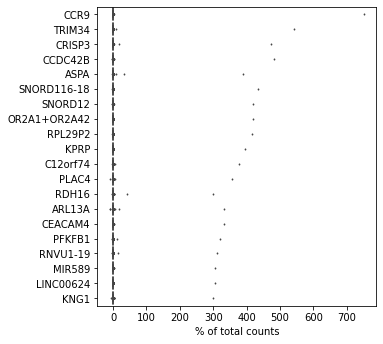

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


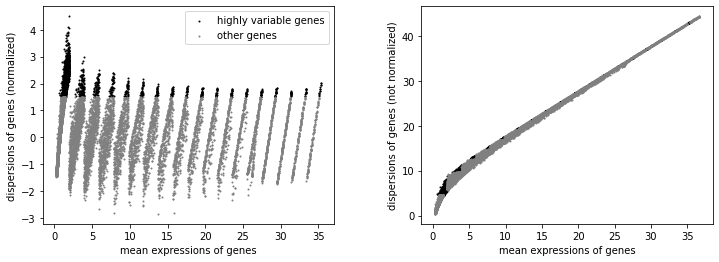

In [17]:
sc.pl.highest_expr_genes(Pancreas_adata, n_top=20, )
sc.pp.highly_variable_genes(Pancreas_adata,n_top_genes=2000)
sc.pl.highly_variable_genes(Pancreas_adata)

In [18]:
# Create a variable list for input genes / features 

Pancreas_adata.var['input_features'] = Pancreas_adata.var['highly_variable']

for i in range(Pancreas_adata.shape[1]):
  if Pancreas_adata.var_names[i] in set(PanglaoDB_Pancreas):
    Pancreas_adata.var['input_features'][i] = True

print(np.asarray(np.where(Pancreas_adata.var['input_features'] == True)).shape)
print(np.asarray(np.where(Pancreas_adata.var['highly_variable'] == True)).shape)
Pancreas_adata.var['input_features']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(1, 2793)
(1, 2000)


SGIP1                        False
AZIN2                        False
CLIC4                         True
AGBL4                         True
NECAP2                       False
                             ...  
KIR2DL4                      False
KIR2DS3                      False
KIR2DS2                      False
BIVM-ERCC5                   False
ERCC_30000:mix1_7500:mix2    False
Name: input_features, Length: 26179, dtype: bool

In [19]:
# Create anndata input for the model by filtering Pancreas_adata

Pancreas_input = Pancreas_adata[:,Pancreas_adata.var['input_features']]
Pancreas_input

View of AnnData object with n_obs × n_vars = 2209 × 2793
    obs: 'Cell Type'
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'input_features'
    uns: 'hvg'

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# device = 'cpu'

cuda


In [21]:
# Create weight constraint so that marker gene weights are non-negative

class NonNegative(tf.keras.constraints.Constraint):

  def __init__(self, weight_mask):
    self.marker_weight_mask = weight_mask
    self.NonMarker_weight_mask = 1 - weight_mask

# Multiply the weight matrix by weight mask

  def __call__(self, w):
    marker_sparse_w = w * self.marker_weight_mask                                                            # make marker weights sparse
    NonNeg_marker_sparse_w = marker_sparse_w * tf.cast(tf.math.greater_equal(marker_sparse_w, 0.), w.dtype)  # sparse * non-negativity constraint 
    NonMarker_sparse_w = w * self.NonMarker_weight_mask                                                      # make non-marker weights sparse
    return NonNeg_marker_sparse_w + NonMarker_sparse_w                                                       # add non-marker weights regardless of non-negativity

In [22]:
class VariationalAutoencoder(Model):
    def __init__(self, num_cell_types, num_genes, reg_penalties, weight_mask):
        super(VariationalAutoencoder, self).__init__()  
        self.reg_penalties = reg_penalties
        self.encoder_weight_mask = tf.keras.backend.constant(weight_mask) 
        self.decoder_weight_mask = tf.keras.backend.constant(weight_mask.T)
        self.mean_encoder = tf.keras.Sequential([
         layers.Dense(num_cell_types, activation='linear', 
                      kernel_regularizer=self.encoder_marker_gene_regularizer, 
                      kernel_constraint=NonNegative(self.encoder_weight_mask)),
        ])
        self.var_encoder = tf.keras.Sequential([
         layers.Dense(num_cell_types, activation='linear', 
                      kernel_regularizer=self.encoder_marker_gene_regularizer, 
                      kernel_constraint=NonNegative(self.encoder_weight_mask)),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(num_genes, activation='linear', 
                      kernel_regularizer=self.decoder_marker_gene_regularizer, 
                      kernel_constraint=NonNegative(self.decoder_weight_mask))
        ])

    def reparameterization(self, mean, var):
        epsilon = tf.random.normal(shape = [mean.shape[1]])             
        z = mean + (var*epsilon)                       
        return z
        
    def call(self, x):
        mean = self.mean_encoder(x)
        log_var = self.var_encoder(x)
        z = self.reparameterization(mean, tf.exp(0.5 * log_var))
        p = tf.keras.activations.softmax(z)
        decoded = self.decoder(p)
        return decoded

    def embed(self, x):
        mean = self.mean_encoder(x)
        log_var = self.var_encoder(x)
        var = tf.exp(0.5 * log_var)
        return tf.keras.activations.softmax(mean), mean, var

    def encoder_marker_gene_regularizer(self, w):
        return tf.reduce_sum(self.reg_penalties * tf.square(w))

    def decoder_marker_gene_regularizer(self, w):
        return tf.reduce_sum(self.reg_penalties.T * tf.square(w))

In [23]:
class Autoencoder(Model):
    def __init__(self, num_cell_types, num_genes, reg_penalties, weight_mask):
        super(Autoencoder, self).__init__()  
        self.reg_penalties = reg_penalties
        self.encoder_weight_mask = weight_mask 
        self.decoder_weight_mask = weight_mask.T
        self.encoder = tf.keras.Sequential([
         layers.Dense(num_cell_types, activation='softmax', 
                      kernel_regularizer=self.encoder_marker_gene_regularizer, 
                      kernel_constraint=NonNegative(self.encoder_weight_mask)),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(num_genes, activation='linear', 
                      kernel_regularizer=self.decoder_marker_gene_regularizer, 
                      kernel_constraint=NonNegative(self.decoder_weight_mask))
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def embed(self, x):
      encoded = self.encoder(x)
      return encoded

    def encoder_marker_gene_regularizer(self, w):
      return tf.reduce_sum(self.reg_penalties * tf.square(w))

    def decoder_marker_gene_regularizer(self, w):
      return tf.reduce_sum(self.reg_penalties.T * tf.square(w))

In [24]:
# Creating weight mask for marker genes

marker_genes = Pancreas_input.var_names
cell_types = pd.unique(PancreasMarkers['cell type'])

marker_gene_cell_type_weight_mask = np.zeros((len(marker_genes), len(cell_types)))
for i, gene in enumerate(marker_genes):
  for j, cell_type in enumerate(cell_types):
    is_marker_gene_for_cell_type = \
      PancreasMarkers[(PancreasMarkers['official gene symbol'] == gene) & 
                      (PancreasMarkers['cell type'] == cell_type)].shape[0] > 0
    if is_marker_gene_for_cell_type:   # Mask = 1
      marker_gene_cell_type_weight_mask[i, j] = 1
    else:                              # Mask = 0
      marker_gene_cell_type_weight_mask[i, j] = 0

print(marker_gene_cell_type_weight_mask.shape)
marker_gene_cell_type_weight_mask

(2793, 12)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Creating marker gene biased regularization mask 

marker_genes = Pancreas_input.var_names
cell_types = pd.unique(PancreasMarkers['cell type'])

marker_gene_cell_type_reg_penalties = np.zeros((len(marker_genes), len(cell_types)))
for i, gene in enumerate(marker_genes):
  for j, cell_type in enumerate(cell_types):
    is_marker_gene_for_cell_type = \
      PancreasMarkers[(PancreasMarkers['official gene symbol'] == gene) & 
                      (PancreasMarkers['cell type'] == cell_type)].shape[0] > 0
    if is_marker_gene_for_cell_type:   # penalize weight lighly if marker gene
      marker_gene_cell_type_reg_penalties[i, j] = 0
    else:                              # penalize weight heavily if not marker gene
      marker_gene_cell_type_reg_penalties[i, j] = 1

print(marker_gene_cell_type_reg_penalties.shape)
marker_gene_cell_type_reg_penalties

(2793, 12)


array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [26]:
NumPancreasCellTypes = len(PancreasMarkers['cell type'].unique())
num_genes = Pancreas_input.shape[1]
autoencoder = VariationalAutoencoder(NumPancreasCellTypes, num_genes, 
                                  marker_gene_cell_type_reg_penalties,
                                  marker_gene_cell_type_weight_mask)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(Pancreas_input.X, Pancreas_input.X,
                          epochs=25,
                          shuffle=True,
                          validation_data=(Pancreas_input.X, Pancreas_input.X))

Epoch 1/25
70/70 [==============================] - 3s 10ms/step - loss: 13.9683 - val_loss: 1.0250
Epoch 2/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9987 - val_loss: 0.9909
Epoch 3/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9899 - val_loss: 0.9887
Epoch 4/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9879 - val_loss: 0.9868
Epoch 5/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9861 - val_loss: 0.9852
Epoch 6/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9845 - val_loss: 0.9837
Epoch 7/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9831 - val_loss: 0.9823
Epoch 8/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9818 - val_loss: 0.9810
Epoch 9/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9805 - val_loss: 0.9797
Epoch 10/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9793 - val_loss: 0.9785
Epoch 11/25
70/70

Text(0.5, 0, 'Epochs')

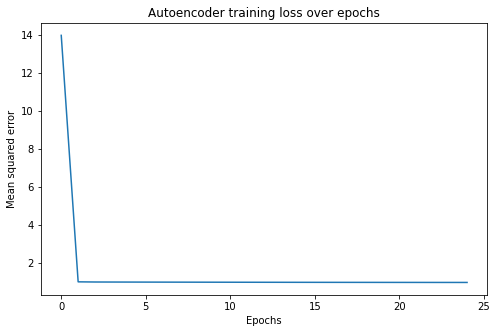

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Autoencoder training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [28]:
def Compute_tTest(mean1,var1,mean2,var2,n):
  tScore = (mean1-mean2) / math.sqrt((var1+var2)/n)
  DegFreedom = ((((var1**2)+(var2**2))/n)**2) / ((((var1**2)+(var2**2))/(n**2))/(n-1))
  return scipy.stats.t.sf(abs(tScore), df=DegFreedom)

In [29]:
latent_embedding, mean, var = autoencoder.embed(Pancreas_input.X)

# assign cell type labels based on maximum probability in the latent layer output 
cell_type_labels = [cell_types[label] for label in 
                    tf.math.argmax(latent_embedding, axis=1).numpy()]

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
NumPancreasCells = Pancreas_input.shape[0]
Pancreas_Assignment_PValues = []
pVal_Threshold = 10

for cell in range(NumPancreasCells):
    MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
    pVal = []
    for LatentNode in range(NumPancreasCellTypes):
      if LatentNode != MaxIndex:
        pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
                                   mean[cell,LatentNode],var[cell,LatentNode],
                                   num_genes))
    Pancreas_Assignment_PValues.append(pVal[np.argmax(pVal)])
    if pVal[np.argmax(pVal)] > pVal_Threshold:
      print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
      cell_type_labels[cell] = 'Unknown'

Pancreas_Assignment_PValues = np.array(Pancreas_Assignment_PValues).ravel()
Pancreas_adata.obs['Pancreas pVal'] = Pancreas_Assignment_PValues

Pancreas_adata.obs['Predicted Cell Type'] = cell_type_labels
Pancreas_input.obs['Predicted Cell Type'] = cell_type_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


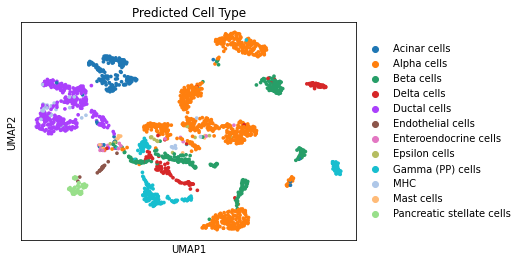

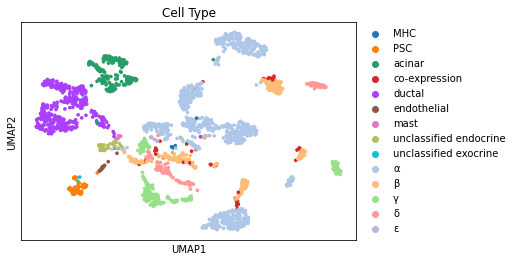

In [30]:
sc.tl.pca(Pancreas_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(Pancreas_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(Pancreas_adata)

sc.pl.umap(Pancreas_adata, color=['Predicted Cell Type'])
sc.pl.umap(Pancreas_adata, color=['Cell Type'])

In [31]:
dir = '/content/drive/MyDrive/ML for genomics project group /Data/Pancreas Data/Processed/'
Pancreas_adata.obs.to_csv(dir + 'BiasedVAE_markerANDhvg_Pancreas_Predictions.csv')

In [32]:
NumPancreasCellTypes = len(PancreasMarkers['cell type'].unique())
num_genes = Pancreas_input.shape[1]
autoencoder = Autoencoder(NumPancreasCellTypes, num_genes, 
                          marker_gene_cell_type_reg_penalties,
                          marker_gene_cell_type_weight_mask)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(Pancreas_input.X, Pancreas_input.X,
                          epochs=25,
                          shuffle=True,
                          validation_data=(Pancreas_input.X, Pancreas_input.X))

Epoch 1/25
70/70 [==============================] - 1s 7ms/step - loss: 9.6839 - val_loss: 1.0140
Epoch 2/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9958 - val_loss: 0.9900
Epoch 3/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9890 - val_loss: 0.9878
Epoch 4/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9871 - val_loss: 0.9860
Epoch 5/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9853 - val_loss: 0.9843
Epoch 6/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9837 - val_loss: 0.9828
Epoch 7/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9822 - val_loss: 0.9813
Epoch 8/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9808 - val_loss: 0.9800
Epoch 9/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9795 - val_loss: 0.9787
Epoch 10/25
70/70 [==============================] - 0s 5ms/step - loss: 0.9783 - val_loss: 0.9776
Epoch 11/25
70/70 [

Text(0.5, 0, 'Epochs')

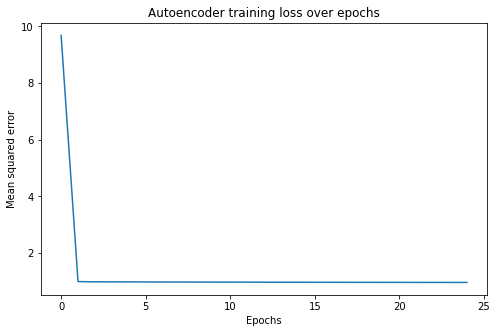

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Autoencoder training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [34]:
latent_embedding = autoencoder.embed(Pancreas_input.X)

# assign cell type labels based on maximum probability in the latent layer output 
cell_type_labels = [cell_types[label] for label in 
                    tf.math.argmax(latent_embedding, axis=1).numpy()]

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
NumPancreasCells = Pancreas_input.shape[0]
Pancreas_Assignment_PValues = []
pVal_Threshold = 10

for cell in range(NumPancreasCells):
    MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
    pVal = []
    for LatentNode in range(NumPancreasCellTypes):
      if LatentNode != MaxIndex:
        pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
                                   mean[cell,LatentNode],var[cell,LatentNode],
                                   num_genes))
    Pancreas_Assignment_PValues.append(pVal[np.argmax(pVal)])
    if pVal[np.argmax(pVal)] > pVal_Threshold:
      print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
      cell_type_labels[cell] = 'Unknown'

Pancreas_Assignment_PValues = np.array(Pancreas_Assignment_PValues).ravel()
Pancreas_adata.obs['Pancreas pVal'] = Pancreas_Assignment_PValues

Pancreas_adata.obs['Predicted Cell Type'] = cell_type_labels
Pancreas_input.obs['Predicted Cell Type'] = cell_type_labels

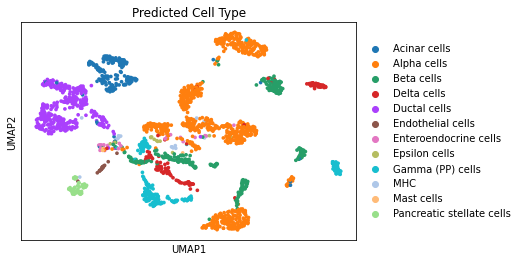

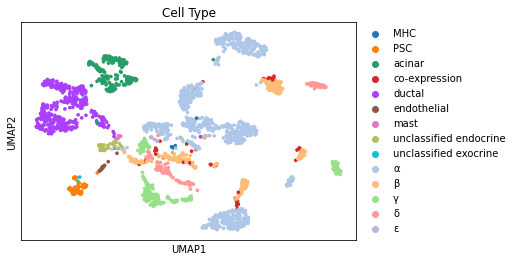

In [35]:
sc.tl.pca(Pancreas_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(Pancreas_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(Pancreas_adata)

sc.pl.umap(Pancreas_adata, color=['Predicted Cell Type'])
sc.pl.umap(Pancreas_adata, color=['Cell Type'])

In [36]:
dir = '/content/drive/MyDrive/ML for genomics project group /Data/Pancreas Data/Processed/'
Pancreas_adata.obs.to_csv(dir + 'BiasedAE_markerANDhvg_Pancreas_Predictions.csv')

In [37]:
# Read and process GBM data 

GBM_adata = sc.read_text("/content/drive/MyDrive/ML for genomics project group /Data/GBM Data/Processed/GBM_LogX.txt", delimiter = '\t', first_column_names=None)
GBM_adata = GBM_adata.T 

# Regress out cell cycle scores
GBMCellCycleScores = pd.read_table("/content/drive/MyDrive/ML for genomics project group /Data/GBM Data/Processed/GbmCellCycleScores.txt", delimiter = '\t')
GBM_adata.obs['score_S'] = GBMCellCycleScores['score_S'].values
GBM_adata.obs['score_G2M'] = GBMCellCycleScores['score_G2M'].values
sc.pp.regress_out(GBM_adata, ['score_S', 'score_G2M'])

# find 2000 HVGs
sc.pp.highly_variable_genes(GBM_adata,n_top_genes=2000)

# Scale (zero-center) data
sc.pp.scale(GBM_adata)

GBM_Metadata = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/GBM Data/Processed/metadata2.csv")
GBM_adata.obs['Cell Type'] = GBM_Metadata['cell_assignment'].values

GBMGenes = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/GBM Data/Processed/features2.tsv",header=None)
GBMGenelist = []
for item in GBMGenes.values.tolist():
  GBMGenelist.append(item[0])
GBM_adata.var_names = GBMGenelist
GBM_adata.var_names

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A4GALT', 'A4GNT', 'AA06',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=23686)

In [38]:
GBMMarkers = MarkerGeneList.iloc[np.asarray(np.where((MarkerGeneList['cell type'] == 'Oligodendrocytes') | 
                                                    (MarkerGeneList['cell type'] == 'T cells') |
                                                    (MarkerGeneList['cell type'] == 'Macrophages')))[0,:],:]

PanglaoDB_GBM = GBMMarkers['official gene symbol']
PanglaoDB_GBM = list(set(PanglaoDB_GBM) & set(GBM_adata.var_names))

# Manually add malignant gene markers 
MalignantGenesPool = ['CD133','CD44','ABCC3','TNFRSF1A','MGMT','IDH 1','IDH 2','ATRX','1p/19q','TP53','RB','PI3K','RKT','RAS','TERT']
MalignantGenes = []
for g in MalignantGenesPool:
  if ((g in GBM_adata.var_names) & (g not in PanglaoDB_GBM)):
    MalignantGenes.append(g)
MalignantGenes

['CD44', 'ABCC3', 'TNFRSF1A', 'MGMT', 'ATRX', 'TP53', 'TERT']

In [39]:
Malignant_df = pd.DataFrame({"official gene symbol":MalignantGenes, "cell type":['Malignant']*len(MalignantGenes)})
Malignant_df

,official gene symbol,cell type
0,CD44,Malignant
1,ABCC3,Malignant
2,TNFRSF1A,Malignant
3,MGMT,Malignant
4,ATRX,Malignant
5,TP53,Malignant
6,TERT,Malignant


In [40]:
PanglaoDB_GBM = PanglaoDB_GBM + list(Malignant_df['official gene symbol'])
len(PanglaoDB_GBM)

302

In [41]:
GBMMarkers_list = []
for gene in PanglaoDB_GBM:
  if gene in list(GBMMarkers['official gene symbol']):
    GBMMarkers_list.append({
        'official gene symbol': gene,
        'cell type': GBMMarkers.loc[GBMMarkers['official gene symbol'] == gene, 'cell type'].iloc[0]
    })
        
GBMMarkers = pd.DataFrame(GBMMarkers_list)
print(GBMMarkers.shape)
GBMMarkers.head()

(295, 2)


,official gene symbol,cell type
0,ENPP6,Oligodendrocytes
1,MMP12,Macrophages
2,PNPLA2,Oligodendrocytes
3,CREB5,Oligodendrocytes
4,GIMAP5,T cells


In [42]:
GBMMarkers = pd.concat([GBMMarkers, Malignant_df])
print(GBMMarkers.shape)
GBMMarkers.head()

(302, 2)


,official gene symbol,cell type
0,ENPP6,Oligodendrocytes
1,MMP12,Macrophages
2,PNPLA2,Oligodendrocytes
3,CREB5,Oligodendrocytes
4,GIMAP5,T cells


In [43]:
# Create a variable list for input genes / features 
GBM_adata.var['input_features'] = GBM_adata.var['highly_variable']

for i in range(GBM_adata.shape[1]):
  if GBM_adata.var_names[i] in set(PanglaoDB_GBM):
    GBM_adata.var['input_features'][i] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# Create anndata input for the model by filtering GBM_adata
GBM_input = GBM_adata[:,GBM_adata.var['input_features']]
GBM_input

View of AnnData object with n_obs × n_vars = 7930 × 2161
    obs: 'score_S', 'score_G2M', 'Cell Type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'input_features'
    uns: 'hvg'

In [45]:
marker_genes = GBM_input.var_names
cell_types = pd.unique(GBMMarkers['cell type'])

marker_gene_cell_type_reg_penalties = np.zeros((len(marker_genes), len(cell_types)))
for i, gene in enumerate(marker_genes):
  for j, cell_type in enumerate(cell_types):
    is_marker_gene_for_cell_type = \
      GBMMarkers[(GBMMarkers['official gene symbol'] == gene) & 
                 (GBMMarkers['cell type'] == cell_type)].shape[0] > 0
    if is_marker_gene_for_cell_type:   # penalize weight lighly if marker gene
      marker_gene_cell_type_reg_penalties[i, j] = 0
    else:                              # penalize weight heavily if not marker gene
      marker_gene_cell_type_reg_penalties[i, j] = 1

print(marker_gene_cell_type_reg_penalties.shape)
marker_gene_cell_type_reg_penalties

(2161, 4)


array([[1., 1., 1., 1.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [46]:
marker_genes = GBM_input.var_names
cell_types = pd.unique(GBMMarkers['cell type'])

marker_gene_cell_type_weight_mask = np.zeros((len(marker_genes), len(cell_types)))
for i, gene in enumerate(marker_genes):
  for j, cell_type in enumerate(cell_types):
    is_marker_gene_for_cell_type = \
      GBMMarkers[(GBMMarkers['official gene symbol'] == gene) & 
                      (GBMMarkers['cell type'] == cell_type)].shape[0] > 0
    if is_marker_gene_for_cell_type:   # Mask = 1
      marker_gene_cell_type_weight_mask[i, j] = 1
    else:                              # Mask = 0
      marker_gene_cell_type_weight_mask[i, j] = 0

print(marker_gene_cell_type_weight_mask.shape)
marker_gene_cell_type_weight_mask

(2161, 4)


array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [47]:
NumGBMCellTypes = len(GBMMarkers['cell type'].unique())
num_genes = GBM_input.shape[1]
autoencoder = VariationalAutoencoder(NumGBMCellTypes, num_genes, 
                                  marker_gene_cell_type_reg_penalties,
                                  marker_gene_cell_type_weight_mask)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

history = autoencoder.fit(GBM_input.X, GBM_input.X,
                          epochs=100,
                          shuffle=True,
                          validation_data=(GBM_input.X, GBM_input.X))

Epoch 1/100
248/248 [==============================] - 2s 7ms/step - loss: 2.3796 - val_loss: 0.9965
Epoch 2/100
248/248 [==============================] - 1s 6ms/step - loss: 0.9950 - val_loss: 0.9933
Epoch 3/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9923 - val_loss: 0.9909
Epoch 4/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9899 - val_loss: 0.9886
Epoch 5/100
248/248 [==============================] - 1s 6ms/step - loss: 0.9878 - val_loss: 0.9868
Epoch 6/100
248/248 [==============================] - 1s 6ms/step - loss: 0.9861 - val_loss: 0.9852
Epoch 7/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9846 - val_loss: 0.9837
Epoch 8/100
248/248 [==============================] - 1s 6ms/step - loss: 0.9832 - val_loss: 0.9825
Epoch 9/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9821 - val_loss: 0.9825
Epoch 10/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9811 - val_lo

Text(0.5, 0, 'Epochs')

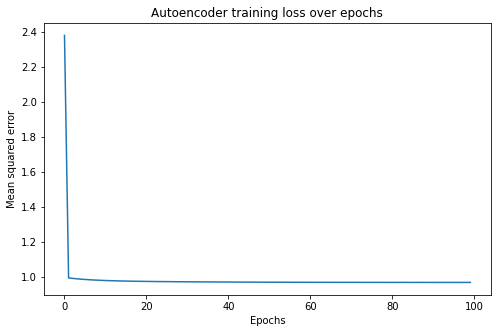

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Autoencoder training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [49]:
latent_embedding, mean, var = autoencoder.embed(GBM_input.X)
cell_type_labels = []
for item in latent_embedding:
  cell_type_labels.append(cell_types[np.where(item == max(item))[0][0]])

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
NumGBMCells = GBM_input.shape[0]
GBM_Assignment_PValues = []
pVal_Threshold = 2

for cell in range(NumGBMCells):
    MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
    pVal = []
    for LatentNode in range(NumGBMCellTypes):
      if LatentNode != MaxIndex:
        pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
                                   mean[cell,LatentNode],var[cell,LatentNode],
                                   num_genes))
    GBM_Assignment_PValues.append(pVal[np.argmax(pVal)])
    if pVal[np.argmax(pVal)] > pVal_Threshold:
      print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
      cell_type_labels[cell] = 'Unknown'

GBM_Assignment_PValues = np.array(GBM_Assignment_PValues).ravel()
GBM_adata.obs['GBM pVal'] = GBM_Assignment_PValues

GBM_adata.obs['Predicted Cell Type'] = cell_type_labels
GBM_input.obs['Predicted Cell Type'] = cell_type_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


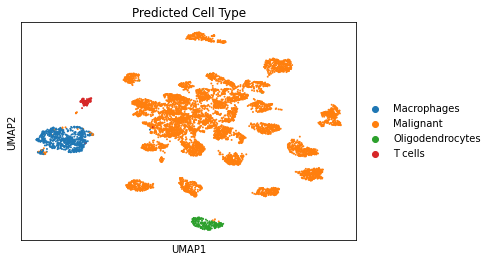

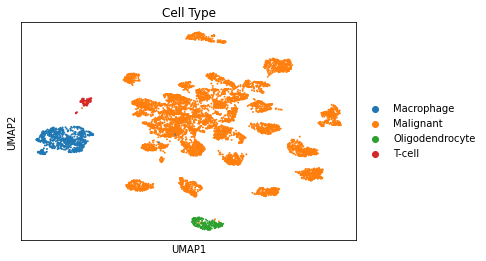

In [50]:
sc.tl.pca(GBM_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(GBM_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(GBM_adata)

sc.pl.umap(GBM_adata, color=['Predicted Cell Type'])
sc.pl.umap(GBM_adata, color=['Cell Type'])

In [51]:
dir = '/content/drive/MyDrive/ML for genomics project group /Data/GBM Data/Processed/'
GBM_adata.obs.to_csv(dir + 'BiasedVAE_markerANDhvg_GBM_Predictions.csv')

In [52]:
NumGBMCellTypes = len(GBMMarkers['cell type'].unique())
num_genes = GBM_input.shape[1]
autoencoder = Autoencoder(NumGBMCellTypes, num_genes, 
                        marker_gene_cell_type_reg_penalties,
                        marker_gene_cell_type_weight_mask)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

history = autoencoder.fit(GBM_input.X, GBM_input.X,
                          epochs=100,
                          shuffle=True,
                          validation_data=(GBM_input.X, GBM_input.X))

Epoch 1/100
248/248 [==============================] - 2s 6ms/step - loss: 1.9158 - val_loss: 0.9962
Epoch 2/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9947 - val_loss: 0.9930
Epoch 3/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9918 - val_loss: 0.9904
Epoch 4/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9894 - val_loss: 0.9882
Epoch 5/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9873 - val_loss: 0.9863
Epoch 6/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9856 - val_loss: 0.9846
Epoch 7/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9840 - val_loss: 0.9831
Epoch 8/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9826 - val_loss: 0.9819
Epoch 9/100
248/248 [==============================] - 1s 4ms/step - loss: 0.9814 - val_loss: 0.9808
Epoch 10/100
248/248 [==============================] - 1s 5ms/step - loss: 0.9804 - val_lo

Text(0.5, 0, 'Epochs')

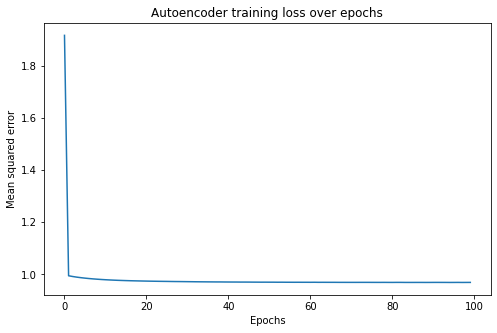

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Autoencoder training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [54]:
latent_embedding = autoencoder.embed(GBM_input.X)
cell_type_labels = []
for item in latent_embedding:
  cell_type_labels.append(cell_types[np.where(item == max(item))[0][0]])

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
NumGBMCells = GBM_input.shape[0]
GBM_Assignment_PValues = []
pVal_Threshold = 2

for cell in range(NumGBMCells):
    MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
    pVal = []
    for LatentNode in range(NumGBMCellTypes):
      if LatentNode != MaxIndex:
        pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
                                   mean[cell,LatentNode],var[cell,LatentNode],
                                   num_genes))
    GBM_Assignment_PValues.append(pVal[np.argmax(pVal)])
    if pVal[np.argmax(pVal)] > pVal_Threshold:
      print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
      cell_type_labels[cell] = 'Unknown'

GBM_Assignment_PValues = np.array(GBM_Assignment_PValues).ravel()
GBM_adata.obs['GBM pVal'] = GBM_Assignment_PValues

GBM_adata.obs['Predicted Cell Type'] = cell_type_labels
GBM_input.obs['Predicted Cell Type'] = cell_type_labels

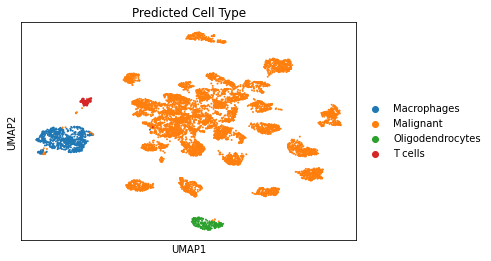

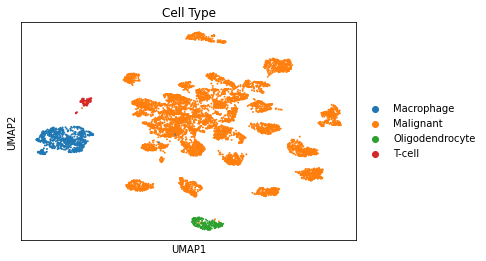

In [55]:
sc.pl.umap(GBM_adata, color=['Predicted Cell Type'])
sc.pl.umap(GBM_adata, color=['Cell Type'])

In [56]:
dir = '/content/drive/MyDrive/ML for genomics project group /Data/GBM Data/Processed/'
GBM_adata.obs.to_csv(dir + 'BiasedAE_markerANDhvg_GBM_Predictions.csv')